<a href="https://colab.research.google.com/github/sharop/TallerGrafos25/blob/main/explorar_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introducción

El sector de la banca minorista enfrenta grandes retos para gestionar depósitos debido a cambios en las tasas de interés, comportamientos de los clientes cada vez más variables y avances tecnológicos constantes. Hasta 2025 se espera un crecimiento lento en los depósitos, mientras que su costo ha subido, afectando las ganancias por intereses de los bancos. Existe una fuerte competencia por obtener depósitos, ya que los bancos necesitan liquidez y los clientes no aceptan fácilmente tasas más bajas. Además, la situación económica general y la incertidumbre política también influyen en el comportamiento de clientes y empresas. Por esto, los bancos están enfocados en captar y mantener clientes, ofrecer precios personalizados y mejorar la experiencia digital.





# 2. Escenario

Las bases de datos de grafos son muy efectivas para analizar la complejidad de los depósitos en la banca minorista. Utilizando las relaciones entre clientes, cuentas y transacciones, estas bases permiten que los bancos representen visualmente y analicen el comportamiento de los clientes. Esto ayuda a optimizar estrategias de precios, identificar posibles riesgos y personalizar ofertas según necesidades específicas y tendencias del mercado.

En comparación con los sistemas tradicionales, las bases de datos de grafos ofrecen análisis en tiempo real, respuestas más rápidas y mejores capacidades de modelado. Estas ventajas se traducen en mejores experiencias para el cliente, gestión de riesgos más eficiente y mayor rentabilidad para los bancos.



# 3. Solución

Las bases de datos de grafos ofrecen un enfoque único para analizar depósitos bancarios, superando las limitaciones de las bases de datos tradicionales (relacionales). Estas bases pueden modelar relaciones complejas entre clientes, cuentas y transacciones, algo esencial para entender el comportamiento de los depósitos. Esta metodología es similar al uso de grafos para detección de fraudes.

Usando teoría de grafos, estas bases representan claramente entidades (clientes, cuentas) y sus conexiones (transacciones). Esto facilita análisis más profundos que van más allá de simples datos aislados, ayudando a los bancos a gestionar depósitos eficientemente.

### 3.1 ¿Cómo pueden ayudar las bases de datos de grafos?

- **Análisis de enlaces:** Explorar conexiones entre datos demográficos de clientes, actividades en cuentas e historial de transacciones para entender patrones complejos en depósitos. Esto facilita visualizar cómo diversos factores afectan las tendencias.

- **Detección de patrones:** Al igual que en la detección de fraudes, las bases de grafos analizan depósitos para descubrir relaciones ocultas y tendencias emergentes. Por ejemplo, identificar grupos de clientes con comportamientos similares o detectar movimientos inusuales de dinero.

- **Análisis en tiempo real:** Monitorean y analizan actividades de depósitos al instante, permitiendo que los bancos respondan rápidamente a cambios inesperados en el comportamiento de los clientes o en las condiciones del mercado.

En resumen, las bases de datos de grafos son superiores en situaciones donde la información es compleja e interconectada. Al adoptar esta tecnología, los bancos mejoran su comprensión del comportamiento del cliente y perfeccionan sus estrategias para gestionar depósitos.

4.1 Modelo de Datos
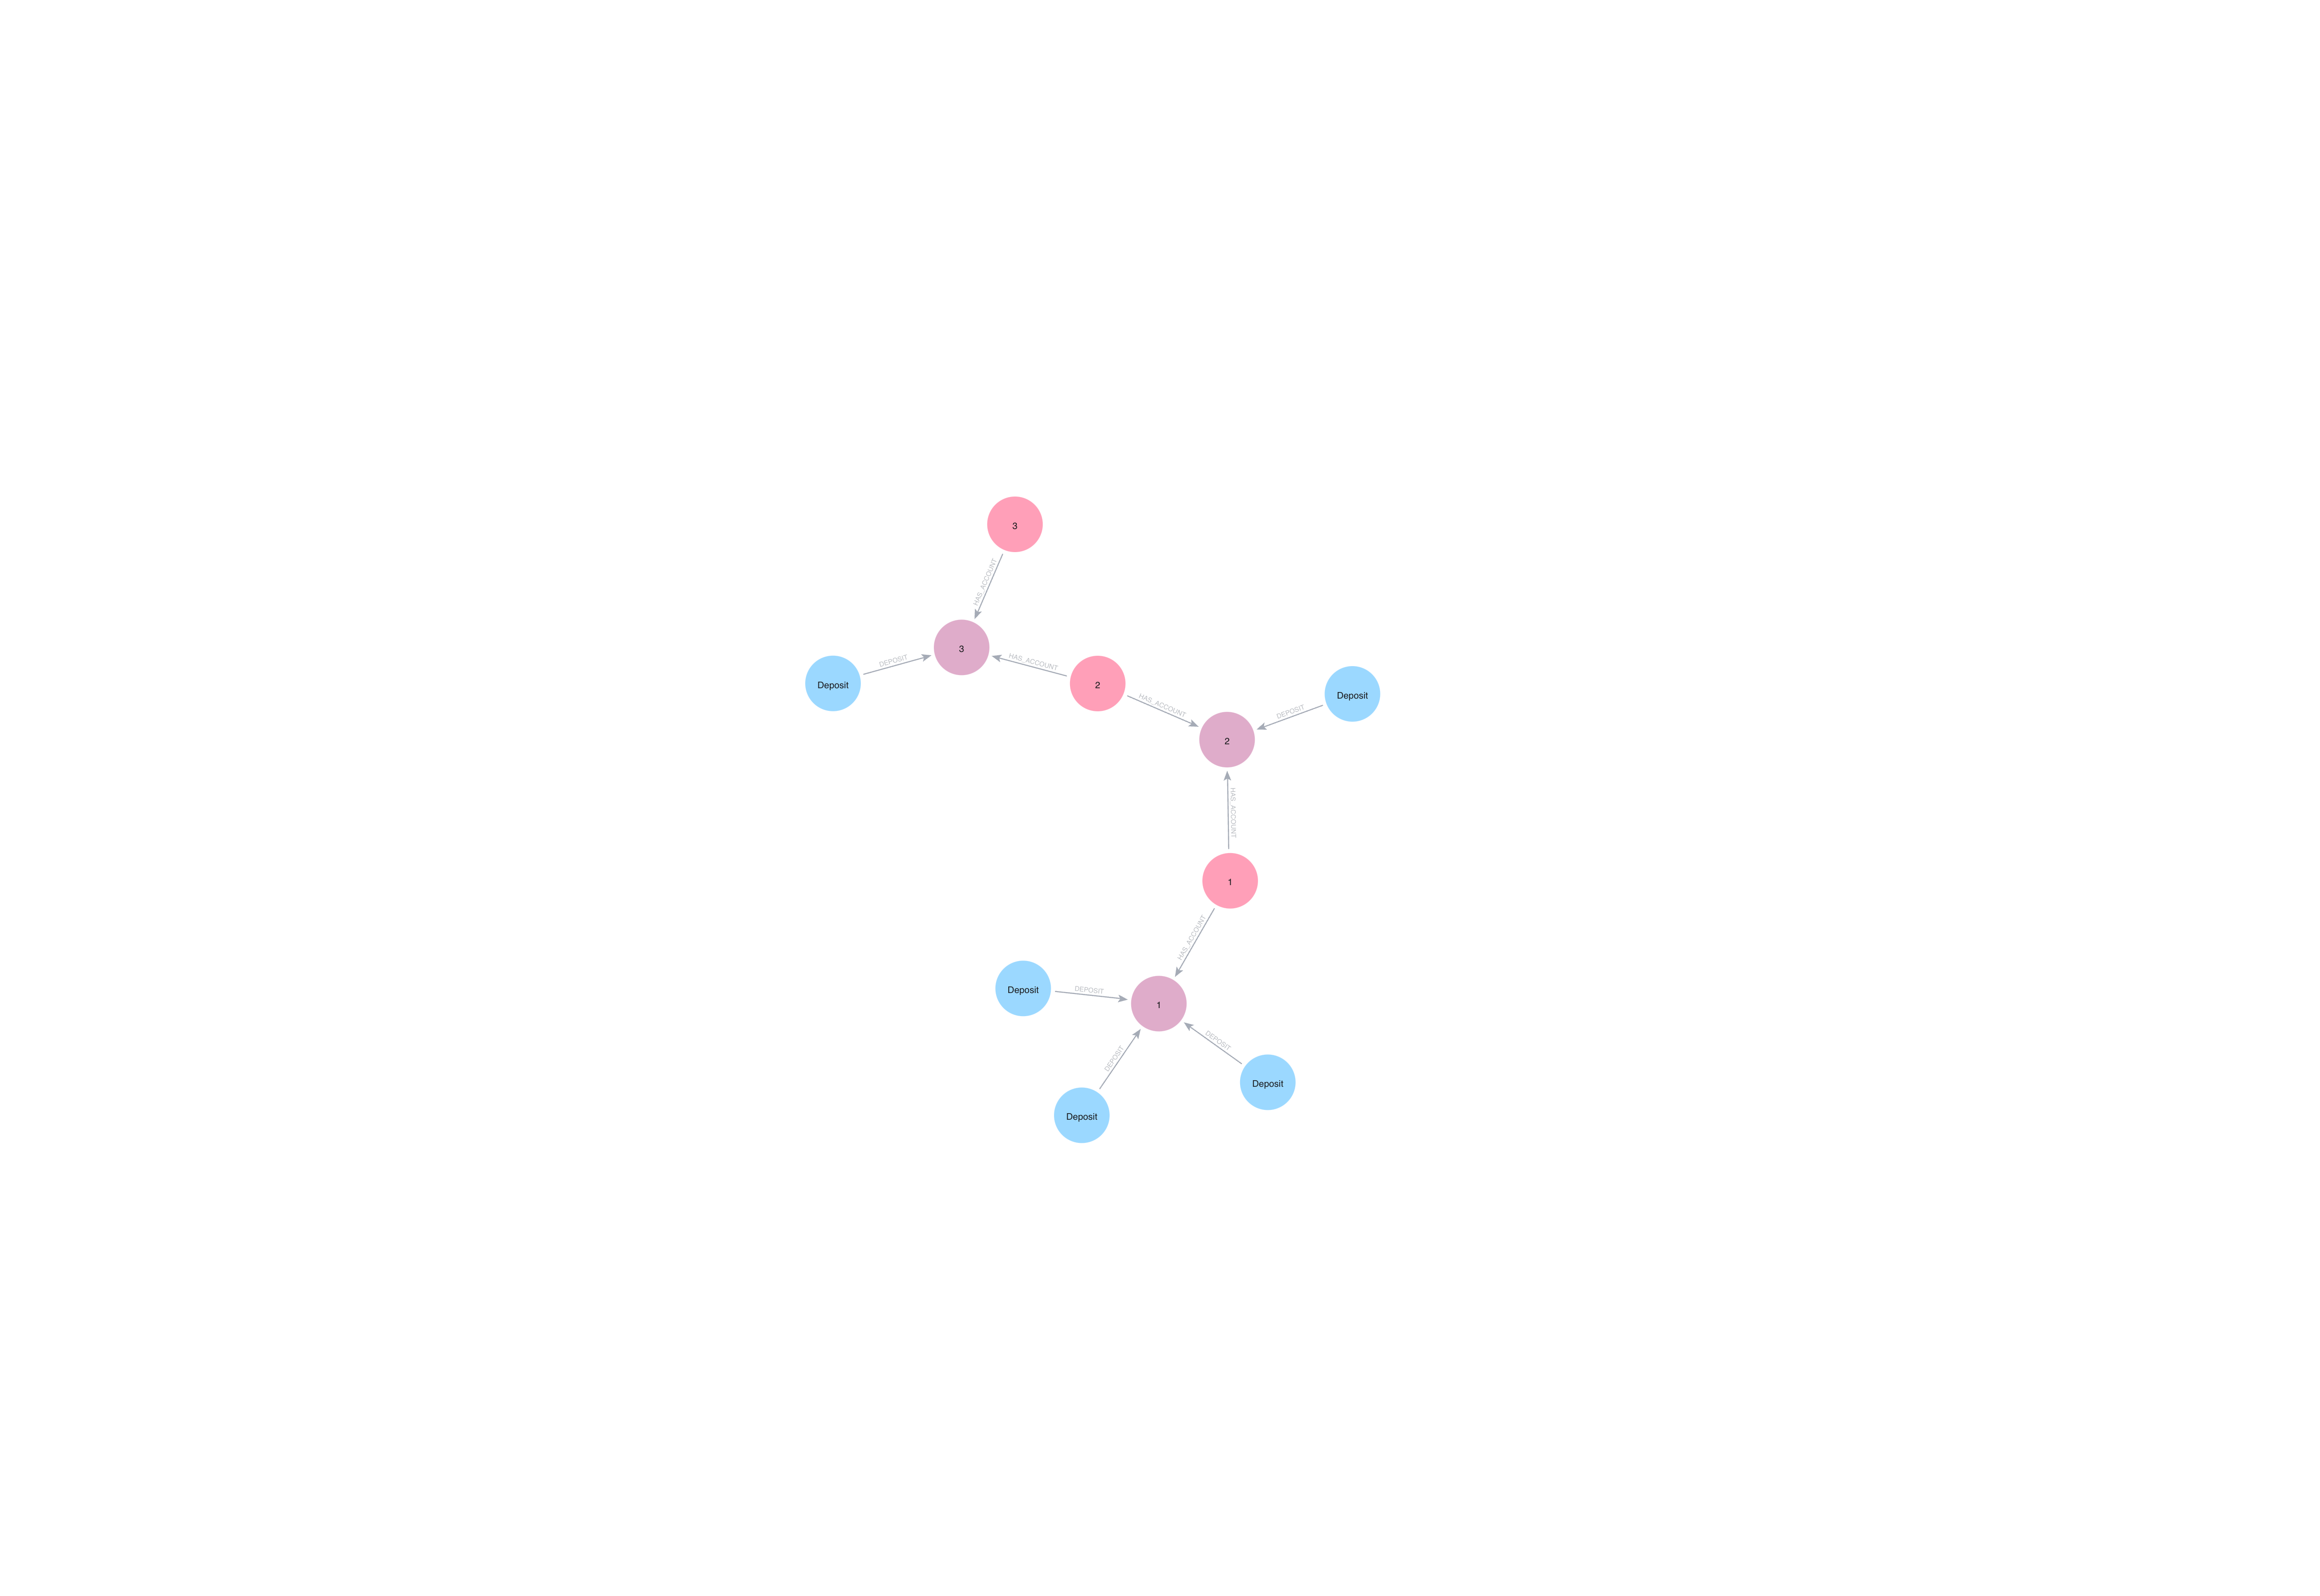



4.1.1 Campos requeridos

De acuerdo con los datos de prueba proporcionados y la estructura del caso de uso de fraude en reclamaciones, aquí está cómo puede ampliarse la sección de campos requeridos para incluir información sobre clientes, cuentas y depósitos:

Nodo Cliente:
	•	id: Identificador único del cliente

Nodo Cuenta:
	•	accountNumber: Identificador único de la cuenta
	•	accountType: Tipo de cuenta (por ejemplo, Interna, Externa), indicado por las etiquetas en los datos de prueba

Nodo Depósito:
	•	amount: Monto del depósito
	•	date: Fecha del depósito

Relaciones:
	•	HAS_ACCOUNT: Conecta un nodo Cliente con un nodo Cuenta.
	•	DEPOSIT: Conecta un nodo Depósito con un nodo Cuenta.



	1.	Clientes (Customer) se conectan a Cuentas (Account) mediante la relación HAS_ACCOUNT.
	2.	Depósitos (Deposit) se conectan a Cuentas (Account) mediante la relación DEPOSIT.
	3.	La etiqueta adicional Internal o External dentro de Account indica si la cuenta está en el mismo banco o es un producto externo (por ejemplo, tarjeta de crédito).
	4.	La etiqueta adicional Cash, Check o Wire en Deposit indica el tipo de pago.

Nodos

1. Customer
	•	Etiqueta: Customer
	•	Propiedades:
	•	id (entero): Identificador único para cada cliente.
	•	name (cadena de texto): Nombre del cliente.
	•	customerType (cadena de texto): Clasificación del cliente (por ejemplo, “Personal”, “Business”).



2. Account
	•	Etiquetas:
	•	Account: Indica que es una cuenta.
	•	Internal o External: Califica si la cuenta es interna (propia del banco) o externa (tarjeta de crédito, etc.).
	•	Propiedades:
	•	accountNumber (entero): Número de cuenta único.
	•	accountType (cadena de texto): Tipo de cuenta (p. ej. “Checking”, “Savings”, “CreditCard”).
	•	balance (numérico): Saldo inicial o actual de la cuenta.



3. Deposit
	•	Etiquetas:
	•	Deposit: Indica que es un depósito o pago.
	•	Cash, Check o Wire: Tipo de medio utilizado para el depósito.
	•	Propiedades:
(No están asociadas directamente al nodo, sino a la relación DEPOSIT, ver más abajo).

Nota: En este modelo, las propiedades del depósito (amount, date) se han definido en la relación DEPOSIT. Aun así, el nodo en sí mismo está etiquetado con el tipo de depósito para poder distinguirlo fácilmente.


(El monto y la fecha se asignan en la relación que conecta este nodo con Account.)


Relaciones

1. HAS_ACCOUNT
	•	Origen: Customer
	•	Destino: Account
	•	Propiedades: Ninguna (en este modelo).
	•	Uso: Indica que un cliente posee o está asociado con una cuenta.



2. DEPOSIT
	•	Origen: Deposit
	•	Destino: Account
	•	Propiedades:
	•	amount (numérico): Monto depositado.
	•	date (fecha/hora): Fecha y hora del depósito.
	•	Uso: Vincula un depósito con la cuenta donde se realiza.



El modelo de datos representa un entorno de banca minorista con clientes, cuentas y depósitos.

#Crear el grafo demo

```cypher
// Limpia la base de datos (opcional) para empezar desde cero:
// MATCH (n) DETACH DELETE n

// Crear clientes (agregamos nombre y tipo de cliente)
CREATE (c1:Customer {id: 1, name: "Alice", customerType: "Personal"})
CREATE (c2:Customer {id: 2, name: "Bob", customerType: "Personal"})
CREATE (c3:Customer {id: 3, name: "Charlie", customerType: "Business"})
CREATE (c4:Customer {id: 4, name: "Diana", customerType: "Personal"})

// Crear cuentas (agregamos tipo de cuenta y saldo inicial ficticio)
CREATE (a1:Account:Internal {accountNumber: 1, accountType: "Checking", balance: 1200})
CREATE (a2:Account:Internal {accountNumber: 2, accountType: "Savings", balance: 8000})
CREATE (a3:Account:Internal {accountNumber: 3, accountType: "Checking", balance: 500})
CREATE (a4:Account:External {accountNumber: 4, accountType: "CreditCard", balance: -1500})

// Relacionar clientes con cuentas
// Algunos clientes comparten cuentas
CREATE (c1)-[:HAS_ACCOUNT]->(a1)
CREATE (c1)-[:HAS_ACCOUNT]->(a2)
CREATE (c2)-[:HAS_ACCOUNT]->(a2)
CREATE (c2)-[:HAS_ACCOUNT]->(a3)
CREATE (c3)-[:HAS_ACCOUNT]->(a3)
// Agregamos una cuenta de tarjeta de crédito externa para Diana
CREATE (c4)-[:HAS_ACCOUNT]->(a4)

// Crear depósitos con varios montos, fechas y métodos
// Incluimos "Cash", "Check" y "Wire" para mayor variedad
CREATE (:Deposit:Cash)-[:DEPOSIT {amount: 3000, date: datetime()-duration('P3M')}]->(a1)
CREATE (:Deposit:Check)-[:DEPOSIT {amount: 5000, date: datetime()-duration('P1M')}]->(a1)
CREATE (:Deposit:Cash)-[:DEPOSIT {amount: 1000, date: datetime()}]->(a1)

CREATE (:Deposit:Wire)-[:DEPOSIT {amount: 4000, date: datetime()-duration('P2W')}]->(a2)
CREATE (:Deposit:Cash)-[:DEPOSIT {amount: 2000, date: datetime()}]->(a2)

CREATE (:Deposit:Cash)-[:DEPOSIT {amount: 2500, date: datetime()-duration('P20D')}]->(a3)
CREATE (:Deposit:Check)-[:DEPOSIT {amount: 600, date: datetime()}]->(a3)

// Para la cuenta externa (tarjeta de crédito), podemos simular un pago
CREATE (:Deposit:Wire)-[:DEPOSIT {amount: 500, date: datetime()-duration('P1W')}]->(a4)

```

# Veamos el esquema de la base de datos


```cypher
CALL db.schema.visualization()
```



# Explorar la base de datos
* Borra los nodos  !!!! SOLO EN CASO NECESARIO

```cypher
MATCH (n)
DETACH DELETE n
```



1. Ver todos los nodos y relaciones

Muestra todo el contenido de tu base de datos (nodos y relaciones):
```cypher
MATCH (n)-[r]->(m)
RETURN n, r, m
```




2. Ver todos los clientes y sus cuentas

Busca todos los clientes con sus cuentas asociadas:
```cypher

MATCH (c:Customer)-[:HAS_ACCOUNT]->(a:Account)
RETURN c.id AS customerId, a.accountNumber AS accountId
```


3. Ver los depósitos y las cuentas donde fueron hechos

Muestra la información de depósitos junto con las cuentas a las que están vinculados:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
RETURN d, a, r
```


4. Sumar el total de depósitos por cuenta

Calcula la suma total depositada en cada cuenta:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
WITH a, sum(r.amount) AS totalDepositos
RETURN a.accountNumber AS accountId, totalDepositos
ORDER BY totalDepositos DESC
```




5. Mostrar la actividad de depósitos (monto y fecha)

Lista para cada accountNumber los depósitos con su monto y fecha:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
RETURN a.accountNumber AS accountId, r.amount AS monto, r.date AS fecha
ORDER BY fecha ASC
```



6. Encontrar cuentas compartidas por más de un cliente

Si quieres ver las cuentas que tienen más de un cliente asociado (propiedad shared accounts):
```cypher

MATCH (c:Customer)-[:HAS_ACCOUNT]->(a:Account)
WITH a, collect(c.id) AS listaClientes, count(c) AS numeroClientes
WHERE numeroClientes > 1
RETURN a.accountNumber AS accountId, listaClientes, numeroClientes
```


7. Buscar depósitos por encima de un monto específico

Por ejemplo, todos los depósitos mayores a 2,000:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
WHERE r.amount > 2000
RETURN d, a, r.amount AS monto
```




8. Ver la suma total de depósitos por cliente

Combina la relación HAS_ACCOUNT con DEPOSIT para calcular la suma de depósitos para cada cliente:
```cypher

MATCH (c:Customer)-[:HAS_ACCOUNT]->(a:Account)<-[r:DEPOSIT]-(d:Deposit)
WITH c, sum(r.amount) AS totalCliente
RETURN c.id AS customerId, totalCliente
ORDER BY totalCliente DESC
```



9. Filtrar depósitos dentro de un rango de fechas

Por ejemplo, buscar depósitos de los últimos 2 meses:
```cypher

MATCH (d:Deposit)-[r:DEPOSIT]->(a:Account)
WHERE r.date >= datetime() - duration('P2M')
RETURN d, a, r.amount AS monto, r.date AS fecha
ORDER BY r.date
```



10. Visualizar el grafo (en Neo4j Browser)

Muestra todo el grafo sin direccionalidad, útil para una vista rápida en el Neo4j Browser:
```cypher

MATCH (n)-[r]-(m)
RETURN n, r, m
```


# 5. Consultas Cypher

## 5.1. Buscar todos los depósitos del último mes
```cypher
MATCH path=(:Account)<-[d:DEPOSIT]-(:Deposit)
WHERE d.date > datetime()-duration('P1M')
RETURN path
```

## 5.2. Obtener todos los depósitos de los últimos tres meses con un 50% de superposición de fondos

En esta consulta, identificaremos un cliente válido con los siguientes requisitos:

- Se han realizado depósitos en efectivo durante los 2 meses anteriores (ventana móvil).
- Se han realizado depósitos en efectivo durante el último mes (ventana móvil).
- Obtener depósitos para todas las cuentas del cliente.
- Asegurar que al menos el 50% de los depósitos del mes actual con respecto al promedio de los últimos 2 meses.

```cypher
// Get sum of deposits in the rolling two month window
// 1 month ago to 3 months ago
MATCH (c:Customer)-[:HAS_ACCOUNT]->(:Account)<-[d:DEPOSIT]-(:Deposit)
WHERE d.date < datetime()-duration('P1M')
AND d.date > datetime()-duration('P3M')
WITH AVG(d.amount) AS rollingTwoMnthDepositAvg, c
WHERE rollingTwoMnthDepositAvg > 0


// Get sum of deposits in the current rolling month
MATCH (c)-[:HAS_ACCOUNT]->(:Account)<-[d:DEPOSIT]-(:Deposit)
WHERE d.date > datetime()-duration('P1M')
WITH c, rollingTwoMnthDepositAvg, SUM(d.amount) AS currentMonth
WHERE currentMonth > 0


// Make sure there is atleast 50% of the money being deposited between the current month
// and the avg over the last 2 months
WITH c, rollingTwoMnthDepositAvg, currentMonth
WHERE (currentMonth / rollingTwoMnthDepositAvg) * 100 > 50


// Get all deposits over the last three months for all accounts
MATCH path=(c)-[:HAS_ACCOUNT]->(:Account)<-[d:DEPOSIT]-(:Deposit)
WHERE d.date > datetime()-duration('P3M')


RETURN path
```

**Explicación**:

- La primera parte calcula el promedio de depósitos en los dos meses anteriores (entre 1 y 3 meses atrás).
- La segunda parte calcula la suma de depósitos del último mes.
- Luego, se comprueba si los depósitos del último mes representan al menos el 50% del promedio de los dos meses anteriores.
- Por último, se obtienen todos los depósitos de los últimos 3 meses para las cuentas que cumplan con esos criterios.



## 5.3. Identificar redes de cuentas compartidas entre clientes

Esta consulta identifica redes de clientes que comparten cuentas, lo cual podría indicar posibles anillos de fraude o relaciones familiares/empresariales legítimas.

```cypher
// Find customers who share accounts and get their deposit patterns
MATCH (c1:Customer)-[:HAS_ACCOUNT]->(a:Account)<-[:HAS_ACCOUNT]-(c2:Customer)
WHERE c1.id < c2.id  // Avoid duplicate pairs
WITH c1, c2, a

// Get deposits for shared accounts
OPTIONAL MATCH (d:Deposit)-[dep:DEPOSIT]->(a)
WHERE dep.date > datetime()-duration('P3M')

// Aggregate results
WITH c1, c2, a,
     count(d) as depositCount,
     coalesce(sum(dep.amount), 0) as totalDeposits  // Handle null case when no deposits

// Return the relationship details
RETURN
    c1.id as customer1,
    c2.id as customer2,
    collect(a.accountNumber) as sharedAccounts,
    count(a) as numberOfSharedAccounts,
    sum(depositCount) as totalDeposits,
    sum(totalDeposits) as totalDepositAmount
ORDER BY numberOfSharedAccounts DESC
```

**Explicación**:

1. **MATCH (c1:Customer)-[:HAS_ACCOUNT]->(a:Account)<-[:HAS_ACCOUNT]-(c2:Customer)**  
   Encuentra clientes que comparten cuentas.
2. **OPTIONAL MATCH (d:Deposit)-[dep:DEPOSIT]->(a)**  
   Obtiene los depósitos relacionados con esas cuentas en los últimos 3 meses.
3. **coalesce(sum(dep.amount), 0)**  
   Maneja casos en que no hay depósitos (nulos).
4. Se retornan los clientes, las cuentas compartidas y la suma de los depósitos.

---

## 5.4. Análisis de patrones de flujo de depósitos entre cuentas

Esta consulta identifica patrones de depósitos entre cuentas que ocurren en períodos de tiempo cercanos, lo cual puede indicar transacciones estructuradas o movimientos financieros sospechosos.

```cypher
// Find deposits and their accounts within the last 3 months
MATCH (d1:Deposit)-[dep1:DEPOSIT]->(a1:Account)<-[:HAS_ACCOUNT]-(c1:Customer)
WHERE dep1.date > datetime()-duration('P3M')

// Find other deposits to different accounts within a 1 month window
MATCH (d2:Deposit)-[dep2:DEPOSIT]->(a2:Account)<-[:HAS_ACCOUNT]-(c2:Customer)
WHERE a1 <> a2
AND abs(duration.between(dep1.date, dep2.date).days) < 30

// Return the pattern of related deposits
RETURN
    c1.id as customer1,
    a1.accountNumber as account1,
    dep1.amount as amount1,
    dep1.date as date1,
    c2.id as customer2,
    a2.accountNumber as account2,
    dep2.amount as amount2,
    dep2.date as date2,
    abs(duration.between(dep1.date, dep2.date).days) as daysBetween
ORDER BY daysBetween
```

**Explicación**:

- La primera cláusula **MATCH** localiza depósitos realizados en los últimos 3 meses y el cliente asociado.
- La segunda cláusula **MATCH** busca otros depósitos a cuentas diferentes con un intervalo menor a 30 días.
- Se filtra para cuentas distintas y se mide el tiempo entre las fechas de depósito.
- El **RETURN** muestra la relación y datos de los depósitos.

Esta consulta analiza flujos de depósitos a través de cuentas, lo cual es muy útil para detectar movimientos financieros inusuales.

---

# 6. Graph Data Science (GDS)

## 6.1. Detección de comunidades en redes de depósitos

Esta consulta utiliza la biblioteca **Graph Data Science (GDS)** para detectar comunidades dentro de la red de depósitos. El **método Louvain** es especialmente efectivo para identificar comunidades en redes de fraude. Es un enfoque muy orientado a grafos (*graphy*) porque aplica un algoritmo específico de análisis de redes descrito en las fuentes. Esto puede revelar grupos de clientes y cuentas fuertemente relacionados, indicando actividad fraudulenta organizada.

Primero, proyecta el grafo:

```cypher
// Create a graph projection
CALL gds.graph.project(
    'depositNetwork',
    'Customer',
    'HAS_ACCOUNT'
)
```

Luego ejecuta el algoritmo Louvain:

```cypher
// Run the Louvain algorithm
CALL gds.louvain.stream('depositNetwork')
YIELD nodeId, communityId

// Return results
RETURN gds.util.asNode(nodeId).id AS customerId, communityId
```

**Explicación**:

- **Crea** primero una proyección del grafo, especificando los nodos `Customer` y la relación `HAS_ACCOUNT`.
- **Ejecuta** el algoritmo Louvain para detectar comunidades.
- **Retorna** cada `customerId` y su `communityId`, lo que permite identificar clientes agrupados en la misma comunidad (posiblemente implicados en alguna actividad conjunta).

---

## 6.2. Análisis de centralidad para identificar actores clave

Los algoritmos de centralidad ayudan a localizar los nodos más influyentes o más sospechosos dentro de la red. Este es otro ejemplo de cómo las bases de datos de grafos pueden descubrir anomalías que las bases de datos relacionales típicas no pueden, pues el enfoque se centra en la importancia o influencia de nodos concretos.

Requiere proyectar el grafo, como se hizo en la sección anterior.

```cypher
// Run PageRank
CALL gds.pageRank.stream('depositNetwork')
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).id AS entityId, score
ORDER BY score DESC
```

**Explicación**:

- Primero, se crea la proyección del grafo (igual que antes).
- Luego, se ejecuta el algoritmo **PageRank** para determinar la relevancia de los nodos con base en el número e importancia de sus conexiones.
- Se ordenan los resultados para mostrar los nodos (entidades) con mayor *score*, que podrían ser más influyentes o claves.


# Conexion con python

In [37]:
!pip install neo4j networkx matplotlib
!pip install graphdatascience

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.3 MB/s eta 0:00:00


In [39]:
# Importa las bibliotecas necesarias
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience
import networkx as nx
import matplotlib.pyplot as plt

# Configura los detalles de conexión con Neo4j Aura
URI = "neo4j+s://<tu_instancia>.databases.neo4j.io"
USERNAME = "neo4j"
PASSWORD = "<tu_contraseña>"

In [22]:
# Función para conectar y extraer datos desde Neo4j Aura
def obtener_datos_neo4j(uri, usuario, contraseña, consulta):
    driver = GraphDatabase.driver(uri, auth=(usuario, contraseña))
    with driver.session() as sesion:
        resultados = sesion.run(consulta)
        conexiones = [(registro["origen"], registro["destino"]) for registro in resultados]
    driver.close()
    return conexiones




In [28]:
def extraer_datos_desde_neo4j(uri, user, password):
    """
    Devuelve una lista de (nodos) y una lista de (relaciones) con la forma:
    - nodos: [(node_id, {propiedades})]
    - relaciones: [(node_id_origen, node_id_destino, {propiedades})]
    """
    driver = GraphDatabase.driver(uri, auth=(user, password))
    nodos = []
    relaciones = []
    # Para asignar identificadores únicos al graph de NetworkX, usaremos la id interna de Neo4j
    with driver.session() as session:
        # 2.1. Extraer nodos (con sus etiquetas y propiedades)
        query_nodos = """
        MATCH (n)
        RETURN id(n) AS internalId, labels(n) AS lbls, properties(n) AS props
        """
        results_nodes = session.run(query_nodos)
        for record in results_nodes:
            internal_id = record["internalId"]
            labels = record["lbls"]  # array de etiquetas
            props = record["props"]  # dict con propiedades
            # Guardamos el internal_id como identificador y combinamos con la lista de labels
            # (Podemos guardarlas en props, o en su propio campo.)
            props["labels"] = labels
            nodos.append((internal_id, props))

        # 2.2. Extraer relaciones
        query_rel = """
        MATCH (n)-[r]->(m)
        RETURN id(n) AS fromId, id(m) AS toId, type(r) AS relType, properties(r) AS relProps
        """
        results_rels = session.run(query_rel)
        for record in results_rels:
            from_id = record["fromId"]
            to_id = record["toId"]
            rel_type = record["relType"]
            rel_props = record["relProps"] if record["relProps"] else {}
            # Guardamos el tipo de relación en las propiedades, si así lo deseamos
            rel_props["relType"] = rel_type
            relaciones.append((from_id, to_id, rel_props))
    driver.close()
    return nodos, relaciones

# --------------------------------------
# 3. Construir y analizar un grafo con NetworkX
# --------------------------------------

def construir_grafo_networkx(nodos, relaciones, dirigido=False):
    """
    Construye un grafo de NetworkX (dirigido o no) a partir de listas de nodos y relaciones.
    """
    if dirigido:
        G = nx.DiGraph()
    else:
        G = nx.Graph()

    # Agregamos cada nodo al grafo con sus propiedades
    for node_id, props in nodos:
        G.add_node(node_id, **props)

    # Agregamos cada relación
    for source_id, target_id, props in relaciones:
        G.add_edge(source_id, target_id, **props)

    return G

# --------------------------------------
# 4. Detección de comunidades (Louvain) y PageRank con NetworkX
# --------------------------------------

def analizar_comunidades_louvain(G):
    """
    Identifica comunidades usando Louvain a través de NetworkX 3.0+ o la librería python-louvain.
    Retorna un dict con {nodo: comunidad}.
    """
    # networkx.algorithms.community.louvain_communities(G) retorna una lista de conjuntos de nodos
    # Cada conjunto representa una comunidad
    from networkx.algorithms.community import louvain_communities
    communities = louvain_communities(G, weight=None, resolution=1, threshold=1e-07)

    # Convertimos esa lista de sets en un diccionario nodo->comunidad
    comunidad_por_nodo = {}
    for i, community in enumerate(communities):
        for node in community:
            comunidad_por_nodo[node] = i
    return comunidad_por_nodo

def analizar_centralidad_pagerank(G):
    """
    Calcula la centralidad de PageRank en el grafo.
    Retorna un dict con {nodo: score}.
    """
    pr = nx.pagerank(G)
    return pr

# --------------------------------------
# 5. Visualización
# --------------------------------------
def graficar_grafo(G, comunidad_por_nodo=None, titulo="Grafo de Banca Minorista"):
    """
    Dibuja el grafo con matplotlib, coloreando nodos por comunidad si se provee.
    """
    plt.figure(figsize=(12, 8))

    pos = nx.spring_layout(G, seed=42)  # Layout para posicionar los nodos
    if comunidad_por_nodo:
        # Asignamos un color distinto por comunidad
        comunidades = [comunidad_por_nodo[node] for node in G.nodes()]
        nx.draw_networkx_nodes(G, pos, node_color=comunidades, cmap=plt.cm.Set3, node_size=600)
    else:
        nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=600)

    nx.draw_networkx_labels(G, pos, {n: G.nodes[n].get("name", n) for n in G.nodes()}, font_size=8)
    nx.draw_networkx_edges(G, pos, arrowstyle="->" if isinstance(G, nx.DiGraph) else None, arrowsize=20)
    plt.title(titulo)
    plt.axis("off")
    plt.show()

In [30]:
# 2. Extraer nodos y relaciones
nodos, relaciones = extraer_datos_desde_neo4j(URI, USERNAME, PASSWORD)


In [33]:
# 3. Construir un grafo no dirigido (Graph) o dirigido (DiGraph)
G = construir_grafo_networkx(nodos, relaciones, dirigido=False)

In [34]:
# 4. Análisis de comunidades (Louvain)
comunidad_por_nodo = analizar_comunidades_louvain(G)
print("Comunidades detectadas (Louvain):")
for nodo, com_id in comunidad_por_nodo.items():
  print(f"Nodo {nodo} -> Comunidad {com_id}")

Comunidades detectadas (Louvain):
Nodo 3 -> Comunidad 0
Nodo 15 -> Comunidad 0
Nodo 7 -> Comunidad 0
Nodo 0 -> Comunidad 1
Nodo 4 -> Comunidad 1
Nodo 8 -> Comunidad 1
Nodo 9 -> Comunidad 1
Nodo 10 -> Comunidad 1
Nodo 1 -> Comunidad 2
Nodo 11 -> Comunidad 2
Nodo 12 -> Comunidad 2
Nodo 5 -> Comunidad 2
Nodo 2 -> Comunidad 3
Nodo 13 -> Comunidad 3
Nodo 6 -> Comunidad 3
Nodo 14 -> Comunidad 3
Nodo 16 -> Comunidad 4
Nodo 20 -> Comunidad 4
Nodo 24 -> Comunidad 4
Nodo 25 -> Comunidad 4
Nodo 26 -> Comunidad 4
Nodo 18 -> Comunidad 5
Nodo 29 -> Comunidad 5
Nodo 22 -> Comunidad 5
Nodo 30 -> Comunidad 5
Nodo 19 -> Comunidad 6
Nodo 31 -> Comunidad 6
Nodo 23 -> Comunidad 6
Nodo 17 -> Comunidad 7
Nodo 27 -> Comunidad 7
Nodo 28 -> Comunidad 7
Nodo 21 -> Comunidad 7


In [35]:
# 4.2. Análisis de PageRank
pagerank_scores = analizar_centralidad_pagerank(G)
print("\nResultados PageRank:")
for nodo, score in sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True):
  nombre_nodo = G.nodes[nodo].get("name", f"NodeID:{nodo}")
  print(f"{nombre_nodo} (id:{nodo}): {score:.4f}")


Resultados PageRank:
NodeID:4 (id:4): 0.0660
NodeID:6 (id:6): 0.0660
NodeID:20 (id:20): 0.0660
NodeID:22 (id:22): 0.0660
NodeID:5 (id:5): 0.0623
NodeID:21 (id:21): 0.0623
NodeID:7 (id:7): 0.0456
NodeID:23 (id:23): 0.0456
Alice (id:0): 0.0320
Bob (id:1): 0.0320
Alice (id:16): 0.0320
Bob (id:17): 0.0320
Diana (id:3): 0.0241
NodeID:15 (id:15): 0.0241
Diana (id:19): 0.0241
NodeID:31 (id:31): 0.0241
Charlie (id:2): 0.0187
NodeID:8 (id:8): 0.0187
NodeID:9 (id:9): 0.0187
NodeID:10 (id:10): 0.0187
NodeID:13 (id:13): 0.0187
NodeID:14 (id:14): 0.0187
Charlie (id:18): 0.0187
NodeID:24 (id:24): 0.0187
NodeID:25 (id:25): 0.0187
NodeID:26 (id:26): 0.0187
NodeID:29 (id:29): 0.0187
NodeID:30 (id:30): 0.0187
NodeID:11 (id:11): 0.0179
NodeID:12 (id:12): 0.0179
NodeID:27 (id:27): 0.0179
NodeID:28 (id:28): 0.0179


<ipython-input-28-87feed3fb2c0>:114: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, arrowstyle="->" if isinstance(G, nx.DiGraph) else None, arrowsize=20)


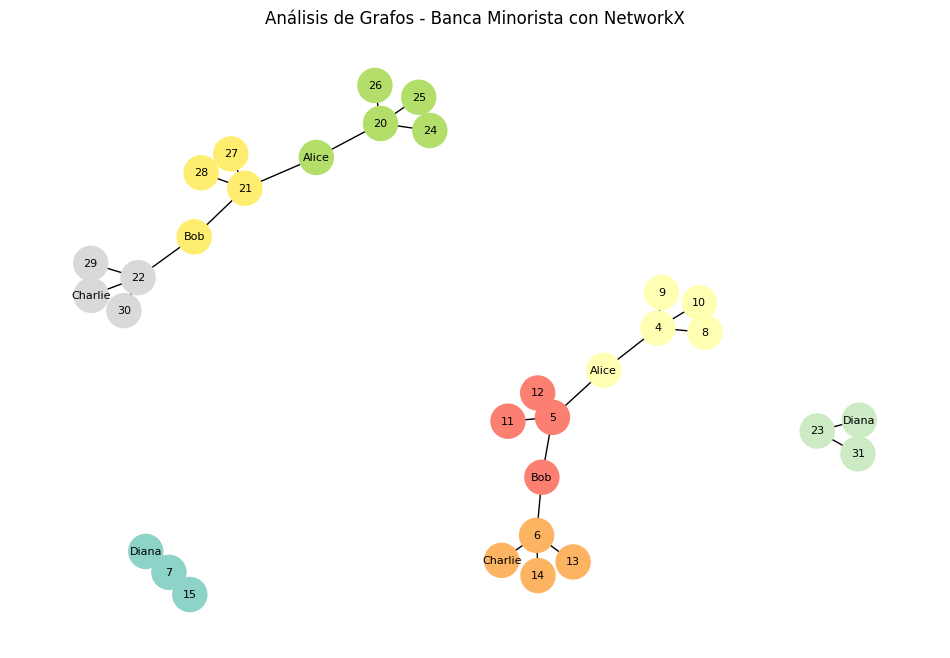

In [36]:
 # 5. Visualización del grafo
graficar_grafo(G, comunidad_por_nodo, titulo="Análisis de Grafos - Banca Minorista con NetworkX")